In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
iris = load_iris()

# Create feature matrix (X) and target vector (y)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
print(X.head()) # Display the first 5 rows of feature matrix

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [15]:
print(y.head()) # Display the first 5 labels


0    0
1    0
2    0
3    0
4    0
dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
#  Checking the shapes of the training and test datasets

print(X_train.shape)  # Shape of training feature matrix
print(X_test.shape)   # Shape of test feature matrix
print(y_train.shape ) # Shape of training target vector
print(y_test.shape )  # Shape of test target vector


(120, 4)
(30, 4)
(120,)
(30,)


In [17]:
#   Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)


In [8]:
model.predict([[6.8, 2.8, 4.8, 1.4]])


C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [9]:

# Training accuracy
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

# Classification report with class names
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Training Accuracy: 1.0
Testing Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



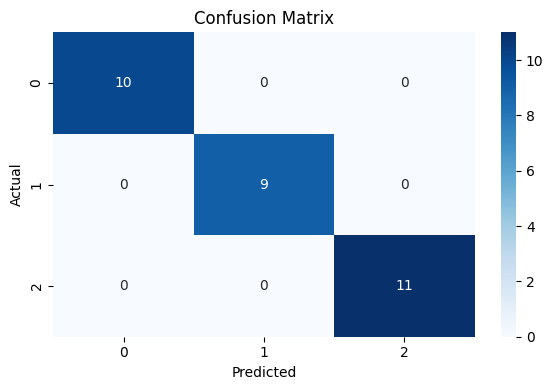

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [11]:
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
              Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


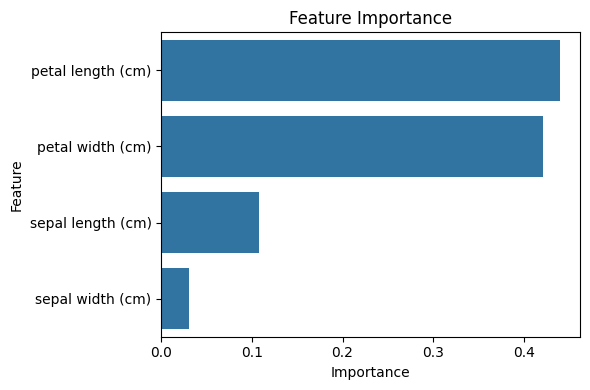

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
